# Exemplo de extração de características

In [3]:
from pathlib import Path
from random import choice
from numpy import ones, pi
from matplotlib import pyplot as plt
from skimage.io import imread
from modules.dataset import *
from modules.segmentation import *
from modules.feature_extraction import *

def plot_image(image,title="Image"):
    fig, axes = plt.subplots(1, 1, figsize=(15, 3))
    if len(image.shape)>2:
        axes.imshow(image)
    else:
        axes.imshow(image,cmap=plt.cm.gray)
    axes.set_title(title)
    axes.axis('off')
    plt.tight_layout()
    plt.show()

def plot_features(features):
    features_names = [
        "Área","Perímetro","Eixo Maior","Eixo Menor",
        "Excentricidade","Solidez","Circularidade",
        "Compacidade","Alongamento","Redondeza","Num Cantos"
    ]

    features_dict = dict(zip(features_names,features))
    for key, value in features_dict.items():
        print(f"{key}: {value}")

Escolhendo e lendo uma imagem aleatoriamente do Dataset Flavia Leaf

In [4]:
dataset_folder = load_dataset_dir(r"Leaves")
img_paths = load_img_files_names(dataset_folder)

image = None

if img_paths is not None:
    print(f"Imagens encontradas na pasta Leaves: {len(img_paths)}")
    img_path =  choice(img_paths)
    name = img_path.name.split("/")[0]
    print(f"Imagem selecionada aleatoriamente: {name}") 
    image = imread(img_path)

Pasta Leaves localizada.
Lista de imagens do dataset Flavia Leaf foi criada.
Imagens encontradas na pasta Leaves: 1907
Imagem selecionada aleatoriamente: 2593.jpg


# Segmentando a imagem selecionada 



Usando limiarização

Área: 336157.0
Perímetro: 3776.111324206152
Eixo Maior: 1625.9975119225187
Eixo Menor: 270.28211279697587
Excentricidade: 0.986087780617555
Solidez: 0.9727919110774137
Circularidade: 0.29625278697476076
Compacidade: 42.41772961086021
Alongamento: 6.015927192133121
Redondeza: 0.16188720481021626
Num Cantos: 1


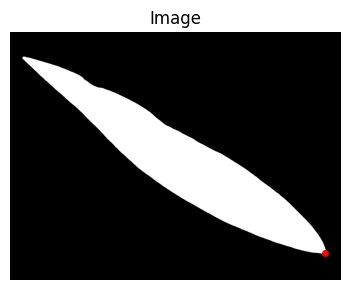

In [5]:
processed_images_thres = thresholding_segmentation(image)

if processed_images_thres is not None:
    thres_features,thres_corners = extract_features(processed_images_thres["Final"])

    plot_features(thres_features)

    fig, axes = plt.subplots(1, 1, figsize=(15, 3))
    coords_y = thres_corners[:, 0]
    coords_x = thres_corners[:, 1]
    fig.canvas.manager.set_window_title("Image")
    axes.imshow(processed_images_thres["Final"],cmap=plt.cm.gray)
    axes.plot(coords_x, coords_y, 'ro', markersize=4)
    axes.set_title("Image")
    axes.axis('off')
    plt.tight_layout()
    plt.show()
    
    

Usando KMeans

Área: 336157.0
Perímetro: 3776.111324206152
Eixo Maior: 1625.9975119225187
Eixo Menor: 270.28211279697587
Excentricidade: 0.986087780617555
Solidez: 0.9727919110774137
Circularidade: 0.29625278697476076
Compacidade: 42.41772961086021
Alongamento: 6.015927192133121
Redondeza: 0.16188720481021626
Num Cantos: 1


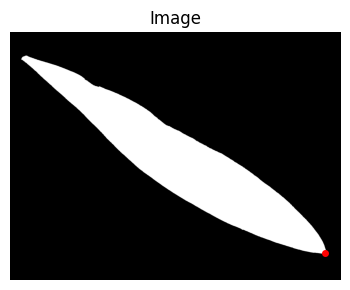

In [6]:
processed_images_kmeans = kmeans_segmentation(image)

if processed_images_kmeans is not None:
    kmeans_features,kmeans_corners = extract_features(processed_images_thres["Final"])

    plot_features(kmeans_features)

    fig, axes = plt.subplots(1, 1, figsize=(15, 3))
    coords_y = kmeans_corners[:, 0]
    coords_x = kmeans_corners[:, 1]
    fig.canvas.manager.set_window_title("Image")
    axes.imshow(processed_images_kmeans["Final"],cmap=plt.cm.gray)
    axes.plot(coords_x, coords_y, 'ro', markersize=4)
    axes.set_title("Image")
    axes.axis('off')
    plt.tight_layout()
    plt.show()